In [14]:
import * from pandas

SyntaxError: invalid syntax (<ipython-input-14-eb3b95dad526>, line 1)

In [15]:
from 'plotly.js/dist/plotly' import * as Plotlyjs

SyntaxError: invalid syntax (<ipython-input-15-364d4b1cf7d8>, line 1)

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d.axes3d as p3
import plotly
import plotly.plotly as py 
import plotly.graph_objs as go
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import random 
from random import randint 
from sklearn.datasets import make_blobs, make_swiss_roll
from astroML.datasets import fetch_dr7_quasar
plotly.offline.init_notebook_mode(connected=True)
plt.style.use("seaborn-bright")

Due by 2 PM on Monday May 13th

Python modules you'll want to use:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

----
 - Use the same two data sets with at least two features from last week:
    - One that has elongated clusters or irregular shapes in the distribution. It should be easy to find a real astrophysical data set like this.
    - One that is convex and isotropic with blobs of approximately equal numbers of points. You'll probably have to make this yourself.



In [17]:
# Real Data
data = fetch_dr7_quasar()
u_gr = data['mag_g'] - data['mag_r']
u_ri = data['mag_r'] - data['mag_i']
index = np.where(u_gr > -15)
u_gr = u_gr[index]
u_ri = u_ri[index]

realX = np.zeros([len(u_gr),2])
realX[:,0] = u_gr
realX[:,1] = u_ri
realX = np.unique(realX,axis=0)
randos = [np.random.randint(0,len(realX)) for i in range(10000)]
realX = realX[randos]

# Fake Data
n_samples = 1500
random_state = 170
num = 10
nnum = 5

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

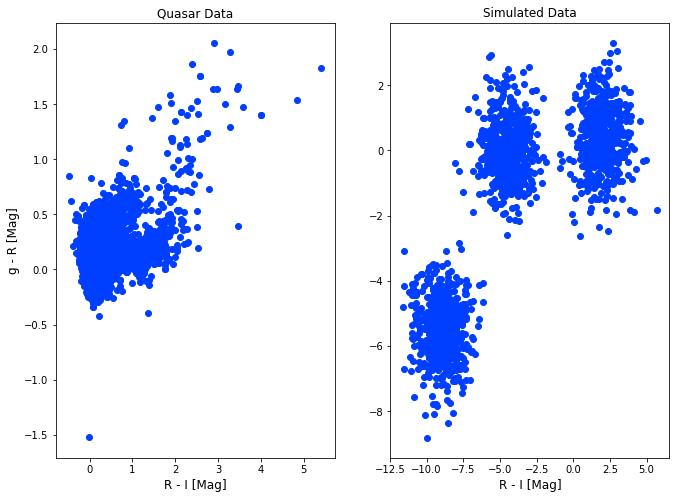

In [18]:
f, (ax,bx) = plt.subplots(1,2,figsize=(11,8))
ax.scatter(realX[:,0],realX[:,1])
ax.set_ylabel("g - R [Mag]",size="large")
ax.set_xlabel("R - I [Mag]",size="large")
ax.set_title("Quasar Data",size="large")

bx.scatter(X[:,0],X[:,1])
bx.set_xlabel("R - I [Mag]",size="large")
bx.set_title("Simulated Data",size="large")
plt.savefig("Data.png")

 - Run the `AgglomerativeClustering` module on each data set with each of the different linkage criteria. Plot the data sets color coded by the cluster labels.



In [19]:
linkage = ["average","complete","ward"]

clustering_real = [AgglomerativeClustering(linkage= link ).fit(realX) for link in linkage]
clustering_fake = [AgglomerativeClustering(linkage= link,n_clusters=3 ).fit(X) for link in linkage]

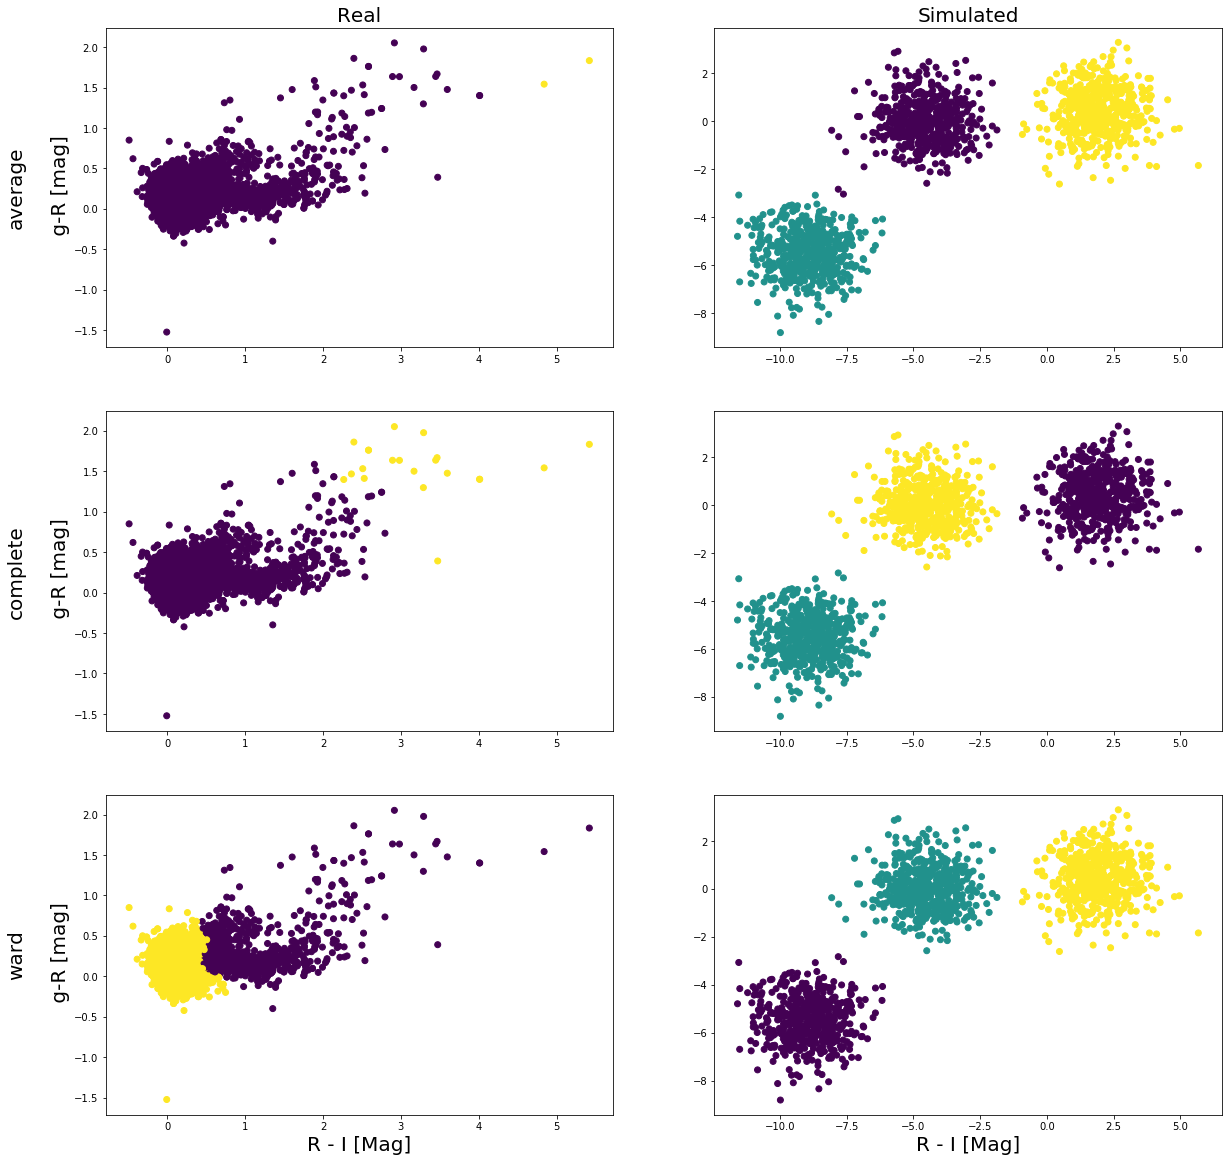

In [20]:
f, axes = plt.subplots(3,2,figsize=(20,20))

for i in range(3):
    axes[i,0].scatter(realX[:,0],realX[:,1],c=clustering_real[i].labels_)
    axes[i,1].scatter(X[:,0],X[:,1],c=clustering_fake[i].labels_)
    axes[i,0].set_ylabel(linkage[i]+"\n\n g-R [mag]",fontsize=20)
axes[0,0].set_title("Real",fontsize=20)
axes[0,1].set_title("Simulated",fontsize=20)
axes[2,0].set_xlabel("R - I [Mag]",fontsize=20)
axes[2,1].set_xlabel("R - I [Mag]",fontsize=20)
plt.show()    

 - Describe in a few sentences the differences in the cluster labels based on what you know about the linkage criteria.

 - Make a `structured` dataset. It is fun to use some subset of either the S curve or Swiss roll datasets here: https://scikit-learn.org/stable/datasets/index.html#generators-for-manifold-learning


In [6]:
SwissX, _ = make_swiss_roll(n_samples=1500,noise=0.05)
SwissX[:,1] *= .5

In [7]:
np.shape(SwissX)

(1500, 3)

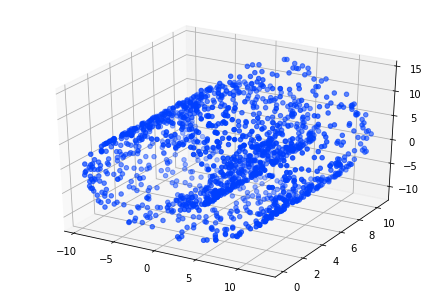

In [8]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(SwissX[:,0],SwissX[:,1],SwissX[:,2])

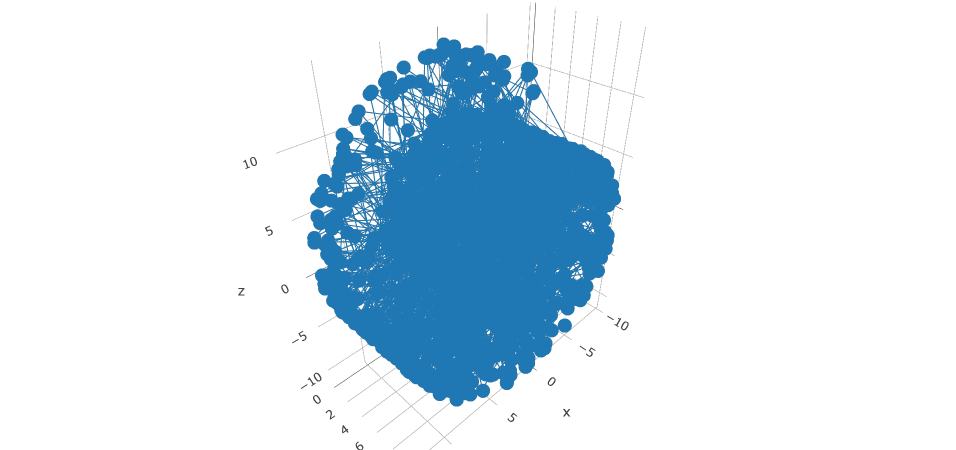

In [21]:
t1 = go.Scatter3d(x=SwissX[:,0],y=SwissX[:,1],z=SwissX[:,2])
layout = go.Layout(
    margin=dict(
        l=0,r=0,b=0,t=0))
fig = go.Figure([t1],layout)
plotly.offline.iplot({"data":[t1],"layout":layout})

### 

 - Run the `AgglomerativeClustering` module on each data set with each of the different linkage criteria. Plot the data sets color coded by the cluster labels.
 - Incorporate connectivity information using `kneighbors_graph`. Try a range of different numbers of neighbors (`n_neighbors`).
  - Describe in a few sentences the differences with different numbers of neighbors. What trends do you see?
 - Time the `fit(X)` step with and without connectivity. (Keep the data set, number of neighbors, and linkage criteria the same.)
 - Save all of this as a single PDF with your name somewhere.
